# Topic 33: Principal Component Analysis - ORIGINAL S.G. 

- 05/25/21
- onl01-dtsc-ft-022221

## Announcements:


- Phase 4 Content/Structure.
- Study Group Schedule

## Learning Objectives


- Gain an intuitive understanding of PCA and eigenvalue decomposition.
- Understand how Principal Component Analysis reduces dimensionality.


- **ACTIVITY: PCA with NHANES**
    - Compress all 1800+ features of the [National Health and Nutrition Examination Survey (NHANES)](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey) down to <10 features.
    - Use PC features to find groups of people in 3D space.
    - Tomorrow: use clustering algorithms to statistically identify groups of people. 
- **ACTIVITY: Follow-Up Feature Selection for Predicting Parkinson's Disease**

## Resources

- Videos:
    - [PCA YouTube Playlist - With statquest and ThreeBlueOneBrown Videos](https://www.youtube.com/playlist?list=PLFknVelSJiSzgzNCV-Wvvk5R8PY2UNype) 
    
- Readings:
    - [In-Depth Article About the Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)
    - [Article: Gentle Introduction to Eigenvalues and Eigenvectors for Machine Learning]( https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/)


## Questions



## Principal Component Analysis 

### PCA Overview

#### Type of Learning
- Unsupervised

#### Assumptions
- Correlation among features

#### Advantages
- Captures most of the variance in a smaller number of features

#### Disadvantages
- Number of principal components that explain most of the variance are determined by the USER

#### Requirements 

- Features must be scaled (StandardScaler)
- Sensitive to missing data.
- Sensitive to outliers.

#### Example Use
- Reducing feature space/dimensionality
- Preprocessing"
- Creating a few, informative variables from tons of data

### What is the "curse of dimensionality"?

#### Reading: [In-Depth Article About the Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

<!-- 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-curse-of-dimensionality-online-ds-pt-100719/master/images/sparsity.png">

 -->



<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/1Dproblem.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/overfitting.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem_separated.png">

> ...

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png">

### How does Principle Component Analysis solve this?

- Performs "eigendecomposition" on the covariance matrix to maximize the variance between data points.
 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-pca-in-scikitlearn-online-ds-sp-000/master/images/inhouse_pca.png">

### Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here's the exact steps:

1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean centered features

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-unsupervised-learning-online-ds-pt-100719/master/images/pca.gif">

### Definitions/Vocabulary


>- **"Decomposition"**: breaking a matrix down into multiple matrices/vectors that can be combined again to produce the original matrix. 
    - There are many methods of decomposition, besides eigendecomposition. 
    - With time series we will discuss seasonal decomposition> breaking down a time series into seasonal components. 


>- **"Eigendecomposition"** will break down a matrix into 2 matrices: eigenvectors and eigenvalues.
    - **"Eigenvectors** are unit vectors, which means that their length or magnitude is equal to 1.0."*
    - **"Eigenvalues** are coefficients applied to eigenvectors that give the vectors their length or magnitude."*
  
_`*` = from: [Article: Gentle Introduction to Eigenvalues and Eigenvectors for Machine Learning]( https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/)_




>- From [Central Lecturer Notebook (updated since video recorded)](https://github.com/flatiron-school/ds-principal_component_analysis):
    - "Eigenvectors are related to eigenvalues by the following property: $\vec{x}$ is an eigenvector of the matrix $A$ if $A\vec{x} = \lambda\vec{x}$, for some eigenvalue $\lambda$."
    


- "**Principal Components**":
    - The magnitude of the eigenvalue indicates how much variance that eigenvector captures/explains. 
    - The eigenvector that has explains the most variance in the data is called the "First Principal Component" or "PC 1".
    - The eigenvector that explains the second-most variance after PC1 is PC2 or the second principal component. 
    
- By selected the top X many principal components, we can capture the most variance in the data with the fewest number of features. 

#### Example Use of PCA from My Neuroscience Research Days

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_070620_FT_cohort_notes/master/images/Offline20Sorter.png">

## ACTIVITY: USING PCA TO COLLAPSE 1800+ HEALTH FEATURES TO <10

### Data - NHANES (2013-2014)

<img src="./images/nhanes.jpg">




>The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) is a program of continuous studies designed to assess the health and nutritional status of adults and children in the United States. The survey examines a nationally representative sample of about 5,000 persons located across the country each year. The survey is unique in that it combines interviews and physical examinations. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

>NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

- *The Above was Borrowed (with Permission) from [Kristin Cooper's Phase 3 Project](https://github.com/kcoop610/phase-3-project)*


#### LINKS:
- [NHANES Dataset - Kaggle](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey)

- [Complete variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from ipywidgets import interact
import plotly.express as px
import plotly.io as pio
pio.templates.default='plotly_dark'

np.random.seed(321)

from sklearn.decomposition import PCA

pd.set_option('display.max_columns',0)
pd.set_option('display.max_info_rows',200)
plt.style.use('seaborn-notebook')

In [56]:
import os, sys,glob
folder = 'national-health-and-nutrition-examination-survey/'
os.listdir(folder)

['medications.csv',
 'diet.csv',
 'examination.csv',
 'demographic.csv',
 'labs.csv',
 'questionnaire.csv']

In [57]:
## Use glob to get list of csvs
files_list = glob.glob(folder+'*.csv')

In [58]:
## Load in all CSVs combined (one liner if you can...)
# Here, it's files[1:] because of an invalid start byte
df = pd.concat([pd.read_csv(file,index_col='SEQN') for file in files_list[1:]],
              axis=1)
df

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
73558,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
73559,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
73560,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1490.0,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
73561,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,14146.781331,10520.302070,1.0,59.0,2.0,2.0,8.0,7.0,1.0,1.0,13.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,4687.0,223.32,494.54,160.63,30.4,193.51,80.414,57.943,30.600,...,NaN,NaN,1.0,NaN,69.0,150.0,3.0,3.0,150.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
83728,38750.761193,51815.103262,1.0,25.0,2.0,2.0,9.0,5.0,1.0,2.0,3.0,4.0,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1253.0,47.55,149.20,50.73,9.3,52.39,24.459,15.965,5.387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83729,15272.505199,10401.781170,1.0,59.0,2.0,2.0,1.0,6.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,2475.0,89.37,290.37,126.54,25.7,110.30,29.372,33.540,37.623,...,NaN,NaN,NaN,NaN,64.0,195.0,1.0,2.0,185.0,NaN,1.0,10.0,NaN,

### Task: Compress 1,800+ features down to 6 using PCA. 

#### First: need to explore and define our column groups


In [59]:
# Some columns are mostly null data - let's explore
nulls = df.isna().sum()/len(df)
nulls[ nulls>.99].index

Index(['DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10',
       'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350JQ',
       ...
       'SMQ690F', 'SMQ830', 'SMQ840', 'SXQ550', 'SXQ841', 'WHD080I', 'WHD080K',
       'WHD080P', 'WHD080U', 'WHD080L'],
      dtype='object', length=281)

In [60]:
# Create a list of mostly null columns
high_null_cols = list(nulls[ nulls>.99].index)
len(high_null_cols)

281

In [61]:
# Now a list of the rest of columns, which should all be numeric
num_cols = df.drop(columns=high_null_cols).select_dtypes('number').columns
len(num_cols)

1499

In [62]:
# Get a list of categorical columns (that aren't mostly null)
cat_cols = df.drop(columns=high_null_cols).select_dtypes('object').columns
len(cat_cols)

31

<AxesSubplot:>

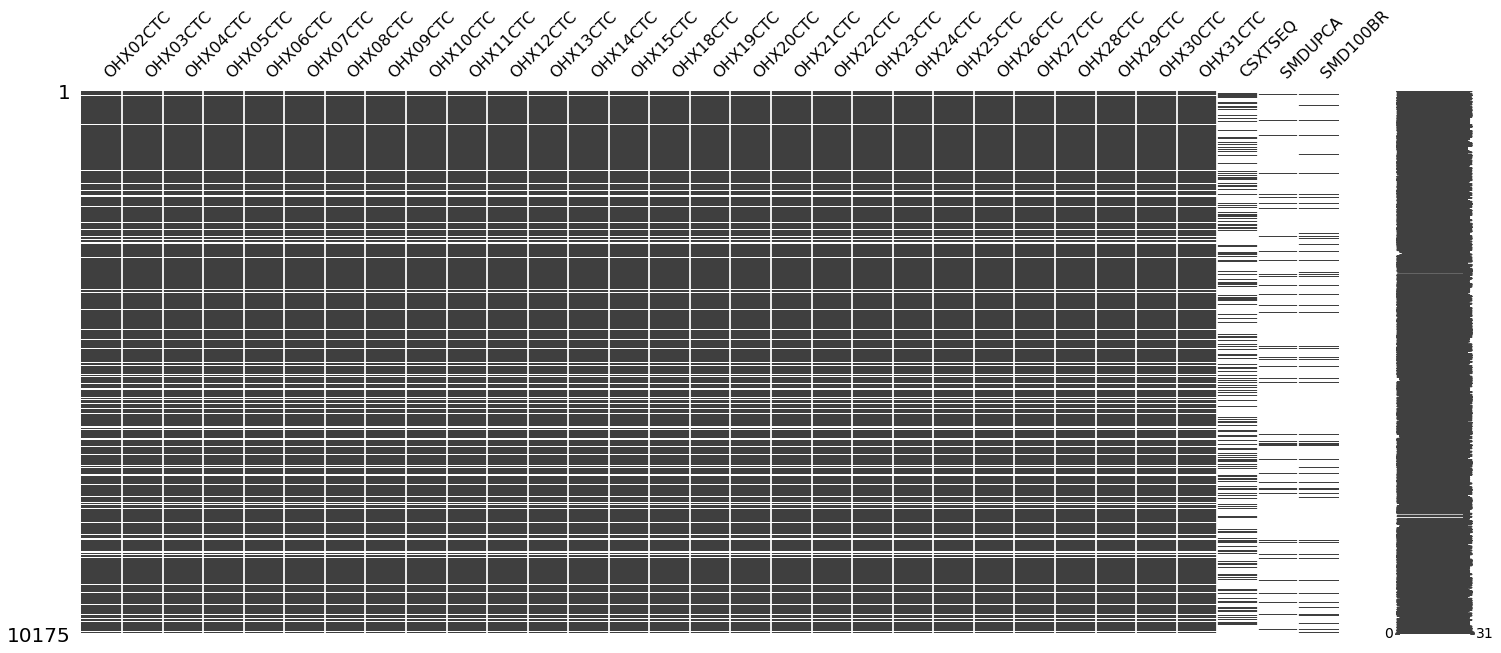

In [63]:
import missingno
missingno.matrix(df[cat_cols])

In [64]:
## Check for null values in cat cols

In [65]:
# Any of them have too many uniques to OHE?
unique_cats = df[cat_cols].nunique()
unique_cats[unique_cats>20]


SMDUPCA     208
SMD100BR    130
dtype: int64

In [66]:
## Verify we got all cols
len([*num_cols, *cat_cols, *high_null_cols]) == len(df.columns)

True

# PCA REVISITED (05/25/21)


- Revisiting discussion of if PC's represent 2 or more features. 

In [67]:
from sklearn import set_config
set_config(display='diagram')

# Let's discuss - what steps am I doing? Why?
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))])

high_nulls_transformer = Pipeline(steps=[
    ('null_indicator', MissingIndicator())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat_ohe', ohe_transformer, cat_cols), 
        ('cat_null', high_nulls_transformer, high_null_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'WHD080S', 'WHD080T', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object',...
                                 Pipeline(steps=[('null_indicator',
                                                  MissingIndicator())]),
                                 ['DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT8',
                                  'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12',
                                  'DRQSDT91', 'DRD350JQ', 'DRD370HQ',
                                  'DRD370JQ', 'DRD370LQ', 'DRD370OQ',
                                  'DRD370PQ', 'DRD370QQ', 'DRD370SQ',
                                  'BMIRECUM', 'BMIHEAD', 'CSQ260D', 'PHAALCHR',
                                  'PHAALCMN', 'PHAANTHR', 'PHAANTMN',
                                  'PHASUPHR', 'PHASUPMN', 'LBXHCG', 'LBXEMA',
                                  'URXVOL3', 'URDFLOW3', ...])])

In [68]:
# Apply preprocessing to entire df and preview data
data = preprocessor.fit_transform(df)

## Get feature names
encoder = preprocessor.named_transformers_['cat_ohe'].named_steps['ohe']
feature_names = [*num_cols, *encoder.get_feature_names(cat_cols), *high_null_cols]


## Original Non-PC Data
data_df = pd.DataFrame(data, columns=feature_names, index = df.index)
data_df

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT7,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,...,RHQ542B,RHQ542D,RHQ576Q,RHQ576U,RHQ580,RHQ586Q,RHQ586U,RHQ596,RHQ602Q,RHQ602U,RXQ525Q,RXQ525U,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ690B,SMQ740,SMQ690G,SMQ845,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690I,SMQ857,SMQ690J,SMQ861,SMQ690F,SMQ830,SMQ840,SXQ550,SXQ841,WHD080I,WHD080K,WHD080P,WHD080U,WHD080L
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,-0.405289,-0.427634,-0.366909,0.234545,0.115522,0.345844,-0.929668,-1.261798,-0.260165,-0.221771,0.355429,-0.020877,0.968468,0.768756,0.151806,-0.043233,0.123882,0.0,0.0,0.0,0.0,-0.762900,-0.401714,-0.719191,-0.000058,1.033476,-0.443095,-0.499045,-0.436419,-0.437780,-0.700310,-0.195746,-0.614115,-0.222951,-0.958302,-0.944236,-0.240513,-0.365319,0.653313,-0.344054,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
73558,-0.375876,-0.432828,-0.366909,0.756411,0.115522,0.345844,-1.112842,-1.752841,-0.260165,-0.221771,0.355429,-0.205833,0.968468,-0.140261,-1.371492,-0.043233,0.123882,0.0,0.0,0.0,0.0,-1.315012,3.458453,6.451903,1.619615,-0.917636,0.190491,1.211351,2.000972,0.660767,0.310606,10.831050,1.992310,-0.222951,3.003553,1.861199,-0.303222,-0.409453,-0.193296,-0.536466,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
73559,0.799463,0.129454,-0.366909,0.234545,0.115522,0.345844,0.169375,0.702372,-0.260165,-0.221771,0.355429,-0.205833,-0.513361,-1.049278,0.151806,-0.043233,-1.648978,0.0,0.0,0.0,0.0,2.181696,-0.214682,-0.208327,-0.133719,-0.058274,-0.539744,-0.184149,0.073399,-0.281999,-0.343251,-0.757532,0.143923,-0.222951,0.579135,0.165316,-0.281274,-0.325071,-0.120093,-0.465584,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
73560,3.125961,1.951912,-0.366909,0.495478,0.115522,0.345844,0.444136,-0.770756,-0.260165,-0.221771,0.090232,-0.205833,-0.513361,-0.140261,0.151806,-0.043233,0.123882,0.0,0.0,0.0,0.0,0.709398,-0.494677,0.111633,-0.674255,-0.389494,-0.464573,-0.368397,-0.046590,-0.535232,-0.632085,-0.297889,-0.883640,-0.222951,0.294737,-0.058631,-0.282319,-0.383916,0.478262,-0.536466,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
73561,0.782853,0.121258,-0.366909,0.965157,0.115522,0.345844,0.169375,-1.752841,-0.260165,-0.221771,0.355429,0.071601,-0.513361,0.768756,0.151806,-0.043233,-1.648978,0.0,0.0,0.0,0.0,-1.499049,-0.571039,-0.436487,-0.539891,-0.282649,-0.282014,-0.438028,-1.350039,0.061636,-1.355380,-0.975746,6.927977,-0.222951,0.922664,0.588777,-0.303222,-0.040006,-0.231488,-0.536466,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,-0.482544,-0.478380,-0.366909,0.756411,0.115522,0.345844,-0.746494,1.193414,-0.260165,-0.221771,0.355429,-0.205833,-0.513361,-0.140261,0.151806,-0.043233,0.123882,0.0,0.0,0.0,0.0,1.629584,3.043441,3.656272,2.241842,0.798417,1.661701,2.867670,3.850537,2.113297,1.184639,2.5

In [69]:
# Add PCA
pca = PCA(n_components=6)

In [70]:
# Let's name these components
pc_feature_names = [f"PC{i}" for i in range(1,pca.n_components+1)]
pc_feature_names

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [71]:
# Fit transform with PCA
pc_data = pca.fit_transform(data_df)
# Add the column names and check out the PC data as a dataframe
df_pca = pd.DataFrame(pc_data, columns=pc_feature_names)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,8.468976,-2.562513,-10.179267,3.721915,1.356098,2.269022
1,10.257361,-7.224914,9.156093,-9.496121,14.594242,2.046903
2,5.944619,-3.134159,-1.218060,0.307531,-1.541523,-4.087070
3,-7.671593,1.182387,-0.463649,0.212978,1.422100,-0.878729
4,7.320567,-2.565092,-9.602006,3.047136,2.926676,-2.953239
...,...,...,...,...,...,...
10170,3.250352,-4.849333,12.806002,-6.556956,8.243321,1.399958
10171,-10.121870,2.572702,-3.032300,1.689592,4.153886,-3.876723
10172,3.115188,-2.585883,3.009955,-2.104346,0.795079,-3.903564
10173,-9.198977,2.050431,-1.896888,1.043062,3.895956,-2.775120


In [73]:
# Check how much variance is explained by all of our PCs
explained_var =pd.Series(pca.explained_variance_ratio_,index=pc_feature_names)#.sum()
explained_var

PC1    0.034591
PC2    0.028296
PC3    0.021349
PC4    0.018752
PC5    0.013044
PC6    0.011681
dtype: float64

In [74]:
explained_var.sum()

0.12771412354753034

### Investigating Contributing Features for Each Principal Component

- https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [86]:
# ## Changing Pandas Options to see full columns in previews and info
n=1000
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
pd.set_option('display.float_format',lambda x: f"{x:.4f}")

In [87]:
## pca .components_ 
pca.components_.shape

(6, 2500)

In [90]:
components = pd.DataFrame(pca.components_, columns=data_df.columns, 
                          index=pc_feature_names)
components

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT7,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370I,DRD370IQ,DRD370J,DRD370K,DRD370KQ,DRD370L,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370RQ,DRD370S,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMXHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,MGDEXSTS,MGD050,MGD060,MGQ070,MGQ080,MGQ090,MGQ100,MGQ110,MGQ120,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHXIMP,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHX02CSC,OHX03CSC,OHX04CSC,OHX05CSC,OHX06CSC,OHX07CSC,OHX08CSC,OHX09CSC,OHX10CSC,OHX11CSC,OHX12CSC,OHX13CSC,OHX14CSC,OHX15CSC,OHX18CSC,OHX19CSC,OHX20CSC,OHX21CSC,OHX22CSC,OHX23CSC,OHX24CSC,OHX25CSC,OHX26CSC,OHX27CSC,OHX28CSC,OHX29CSC,OHX30CSC,OHX31CSC,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,URXUCL,WTSA2YR.x,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR.y,WTSB2YR.x,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPB

In [92]:
## Finding the features "used?"
abs_components = components.abs().T
abs_components

,PC1,PC2,PC3,PC4,PC5,PC6
WTDRD1,0.0372,0.0314,0.0288,0.0133,0.0254,0.0785
WTDR2D,0.0264,0.0198,0.0216,0.0080,0.0180,0.0626
DR1DRSTZ,0.0104,0.0369,0.0151,0.0087,0.0103,0.0042
DR1EXMER,0.0024,0.0101,0.0037,0.0025,0.0040,0.0018
DRABF,0.0125,0.0056,0.0041,0.0029,0.0010,0.0105
...,...,...,...,...,...,...
WHD080I,0.0008,0.0000,0.0000,0.0001,0.0006,0.0003
WHD080K,0.0003,0.0002,0.0000,0.0001,0.0001,0.0002
WHD080P,0.0002,0.0002,0.0001,0.0001,0.0002,0.0001
WHD080U,0.0001,0.0001,0.0000,0.0001,0.0001,0.0000


In [93]:
## loop to get components sorted by variance
sorted_components = {}
for component_name in abs_components.columns:
    comp = abs_components[component_name].sort_values(ascending=False)
    sorted_components[component_name] = comp

In [97]:
sorted_components['PC1'].head(20)

RIDAGEYR   0.1163
SIAPROXY   0.1148
BMXWT      0.1045
HSAQUEX    0.1021
BMXARMC    0.1001
BMXWAIST   0.1000
BMXARML    0.0943
BMXHT      0.0926
BMXBMI     0.0866
PEASCTM1   0.0829
OHX12TC    0.0809
OHX05TC    0.0802
OHX11TC    0.0785
OHX06TC    0.0773
OHX07TC    0.0743
OHX08TC    0.0741
OHX28TC    0.0740
OHX21TC    0.0737
OHX09TC    0.0737
SMQ856     0.0735
Name: PC1, dtype: float64

In [98]:
sorted_components['PC2'].head(20)

ORXGL    0.1430
ORXGH    0.1430
ORXH64   0.1430
ORXH11   0.1428
ORXH40   0.1428
ORXH26   0.1427
ORXH82   0.1427
ORXH67   0.1426
ORXHPI   0.1425
ORXH31   0.1425
ORXH54   0.1425
ORXH70   0.1424
ORXH45   0.1423
ORXH68   0.1422
ORXH71   0.1419
ORXH69   0.1419
ORXH58   0.1419
ORXH42   0.1418
ORXH33   0.1418
ORXH18   0.1416
Name: PC2, dtype: float64

In [99]:
sorted_components['PC3'].head(20)

DR1TKCAL   0.1043
DR1TPHOS   0.1032
DR1TPROT   0.0988
DR1TTFAT   0.0969
DR1TSODI   0.0965
DR1TMFAT   0.0925
DR1TS160   0.0922
DR1TSELE   0.0914
DR1TM181   0.0902
DR1TSFAT   0.0901
DR1TZINC   0.0883
DR1TNIAC   0.0882
DR1TMAGN   0.0880
DR1TS180   0.0875
DR1TVB1    0.0874
DR1TPOTA   0.0873
DR1TCARB   0.0860
DR1TCHL    0.0819
DR1TVB2    0.0815
LBDR64.x   0.0815
Name: PC3, dtype: float64

> The moral of the story is that each component is made up of information from all features.

# ORIGINAL CONTINUED

### So what did we capture?

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'), Text(0.5, 1.0, 'PC1 vs PC2')]

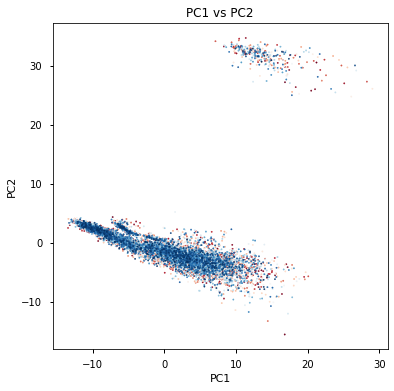

In [25]:
### Plot PC1 vs PC2
x = 'PC1'
y = 'PC2'

fig, ax = plt.subplots(figsize=(6,6))
c=sns.color_palette('RdBu', n_colors=len(df_pca))

ax.scatter(df_pca[x], 
           df_pca[y],
           c=c,s=2)

ax.set(xlabel=x,ylabel=y, title=f"{x} vs {y}")

In [26]:
def scatterplot_2D(df_pca,x,y):
    """Plotting function for interact funcs"""
    fig, ax = plt.subplots(figsize=(6,6))
    c=sns.color_palette('RdBu', n_colors=len(df_pca))
    ax.scatter(df_pca[x],df_pca[y],c=c,s=2)
    ax.set(xlabel=x,ylabel=y, title=f"{x} vs {y}")

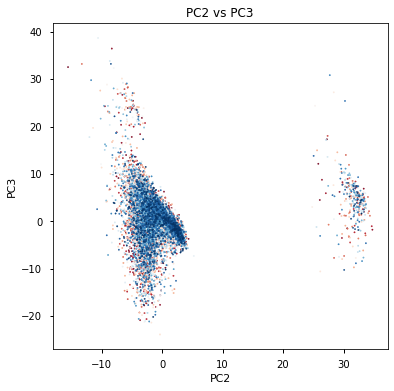

In [27]:
## plot pc2 vs pc3 with function
scatterplot_2D(df_pca,"PC2","PC3")

In [28]:
num_cols[0]

'WTDRD1'

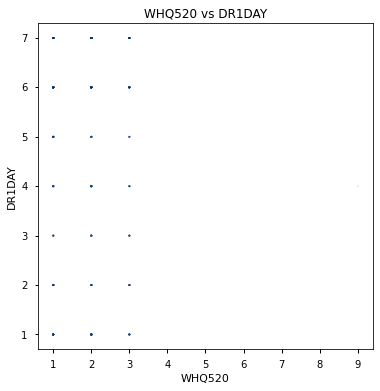

In [29]:
scatterplot_2D(df,num_cols[-1],num_cols[7])

### Make an Interactive Function for Exploring

In [30]:

@interact(x=df_pca.columns,y=df_pca.columns,)
def plot_2d_pca(x='PC1',y='PC2'):
    scatterplot_2D(df_pca,x,y)

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

In [31]:
# Make interactive function to show any comparison
from ipywidgets import interact

@interact(x=df_pca.columns,y=df_pca.columns,)
def plot_2d_pca(x='PC1',y='PC2'):
    scatterplot_2D(df_pca,x,y)

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

## We are only visualizing a small portion of our PC data, lets add another dimension

### Make an interactive plotly scatter3d

In [32]:
# px.scatter_3d(df_pca, x='PC1',y='PC2',z='PC3')

In [33]:
@interact(x=feature_names, y=feature_names,z=feature_names)
def plot_3D_PC(x = 'PC1', y = 'PC2',z='PC3'):

    pfig = px.scatter_3d(df_pca,x=x,y=y,z=z)
    pfig.update_traces(marker={'size':2})
    pfig.show(config = dict({'scrollZoom': False}))

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

### What would we do with this data?

>- Notice how there are groups of datapoints that seem to form groupings/clusters in 3-dimensional space. 
    - Next class we will use K-Means clustering to identify groups of people in our PC data.
    - We will then try to explain those clusters using machine learning models.

___